In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
tokens_path = "D:\Various-APITokens-Details\spotify.txt"

In [3]:
access_token = open(tokens_path,"r").read().split()

In [4]:
client_id = access_token[2]
client_secret = access_token[-1]

In [5]:
auth_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)

sp = spotipy.Spotify(auth_manager=auth_manager)

# Searching Tracks

In [9]:
results = sp.search(q = "track:"+"flower", type = "track", limit = 20)

In [10]:
print(len(results['tracks']))

7


In [11]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

Flowers - By - Miley Cyrus
Track ID: 7DSAEUvxU8FajXtRloy8M0 / Artist ID - 5YGY8feqx7naU7z4HrwZM6
------
Flowers in Your Hair - By - The Lumineers
Track ID: 3Hvg5tRKsQlX25wYwgMF9p / Artist ID - 16oZKvXb6WkQlVAjwo2Wbg
------
Flower Shops (feat. Morgan Wallen) - By - ERNEST
Track ID: 0De9jFjJ4eRLl7Yww2eBw1 / Artist ID - 4GGfAshSkqoxpZdoaHm7ky
------
Lotus Flower Bomb (feat. Miguel) - By - Wale
Track ID: 3MAgQuClHcAV8E9CbeBS6f / Artist ID - 67nwj3Y5sZQLl72VNUHEYE
------
Flower Shops (feat. Morgan Wallen) - By - ERNEST
Track ID: 2ccuOtUjIyx3tPcsnpeBzJ / Artist ID - 4GGfAshSkqoxpZdoaHm7ky
------
Where This Flower Blooms (feat. Frank Ocean) - By - Tyler, The Creator
Track ID: 6KuXb26rHuRy3ZDse1VRmx / Artist ID - 4V8LLVI7PbaPR0K2TGSxFF
------
FLOWER - By - JISOO
Track ID: 69CrOS7vEHIrhC2ILyEi0s / Artist ID - 6UZ0ba50XreR4TM8u322gs
------
Flowers - By - Lauren Spencer Smith
Track ID: 6Z165JvPnS8PYvGW8oLGLc / Artist ID - 79AyR6ATpj2LTPxfb6FX50
------
Flowers - By - Lauren Spencer Smith
Track ID:

In [12]:
song_id = "7DSAEUvxU8FajXtRloy8M0"

# Generating Token for Recommendation

In [15]:
import requests
import base64
# A built-in module in Python, the base64 library offers functions for encoding and decoding binary data 
# to and from base64 strings, effectively converting any binary data to plain text. A common encoding 
# method called Base64 converts binary data into a string of printable ASCII characters.

In [16]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [18]:

token = get_token(client_id, client_secret)

# Getting Recommendation based on Song

In [19]:
def get_track_recommendations(seed_tracks, token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"
    
    headers = {
        "Authorization": "Bearer "+ token
    }
    
    res = requests.get(url = recUrl, headers = headers)
    return res.json()
    

In [20]:
json_response = get_track_recommendations(song_id, token)

In [21]:
json_response

{'tracks': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4dpARuHxo51G3z768sgnrY'},
      'href': 'https://api.spotify.com/v1/artists/4dpARuHxo51G3z768sgnrY',
      'id': '4dpARuHxo51G3z768sgnrY',
      'name': 'Adele',
      'type': 'artist',
      'uri': 'spotify:artist:4dpARuHxo51G3z768sgnrY'}],
    'available_markets': ['AU',
     'AT',
     'BE',
     'BG',
     'CA',
     'CY',
     'CZ',
     'DK',
     'DE',
     'EE',
     'FI',
     'FR',
     'GR',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'NL',
     'NZ',
     'NO',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'GB',
     'AD',
     'LI',
     'MC',
     'ID',
     'JP',
     'TH',
     'VN',
     'RO',
     'IL',
     'ZA',
     'SA',
     'AE',
     'BH',
     'QA',
     'OM',
     'KW',
     'EG',
     'MA',
     'D

In [22]:
uris = []
for i in json_response["tracks"]:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Chasing Pavements" by(Adele)
"Used To Be Young" by(Miley Cyrus)
"Move" by(DNCE)
"My Universe" by(Coldplay)
"Tattoo" by(Loreen)
"Dancing Feet (feat. DNCE)" by(Kygo)
"Lionheart (Fearless)" by(Joel Corry)
"Power" by(Little Mix)
"Get the Party Started" by(P!nk)
"Dancing’s Done" by(Ava Max)


In [23]:
recolist = json_response['tracks']
print(len(recolist))

10


In [24]:
recolist[1]

{'album': {'album_type': 'SINGLE',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'},
    'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6',
    'id': '5YGY8feqx7naU7z4HrwZM6',
    'name': 'Miley Cyrus',
    'type': 'artist',
    'uri': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6'}],
  'available_markets': ['BR',
   'CO',
   'DE',
   'GB',
   'ID',
   'IT',
   'KE',
   'NL',
   'PH',
   'PL',
   'SE'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/1kBfLFXPSDQ8idV5je8gvn'},
  'href': 'https://api.spotify.com/v1/albums/1kBfLFXPSDQ8idV5je8gvn',
  'id': '1kBfLFXPSDQ8idV5je8gvn',
  'images': [{'height': 720,
    'url': 'https://i.scdn.co/image/ab6742d3000053b738374634c3c6684eebbbba22',
    'width': 1280},
   {'height': 720,
    'url': 'https://i.scdn.co/image/ab6742d3000053b738374634c3c6684eebbbba22',
    'width': 1280},
   {'height': 360,
    'url': 'https://i.scdn.co/image/ab6742d3000052b738374634c3c6684eebb

In [25]:
import pandas as pd


In [26]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AU, AT, BE, BG, CA, CY, CZ, DK, DE, EE, FI, F...",1,210506,False,{'isrc': 'GBBKS0700574'},{'spotify': 'https://open.spotify.com/track/0Z...,https://api.spotify.com/v1/tracks/0Z5ok0QLLttA...,0Z5ok0QLLttAKsujOZYOXf,False,Chasing Pavements,78,https://p.scdn.co/mp3-preview/209e4b33acb8fd53...,3,track,spotify:track:0Z5ok0QLLttAKsujOZYOXf
1,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,201023,False,{'isrc': 'USSM22301868'},{'spotify': 'https://open.spotify.com/track/0g...,https://api.spotify.com/v1/tracks/0gclApgGDuO3...,0gclApgGDuO3FNiS7voEye,False,Used To Be Young,5,None,1,track,spotify:track:0gclApgGDuO3FNiS7voEye
2,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,156116,False,{'isrc': 'USUM72207324'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2ZzHR2sOKAOK...,2ZzHR2sOKAOKyN8efCa69E,False,Move,58,None,1,track,spotify:track:2ZzHR2sOKAOKyN8efCa69E
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,226198,False,{'isrc': 'GBAYE2100952'},{'spotify': 'https://open.spotify.com/track/46...,https://api.spotify.com/v1/tracks/46HNZY1i7O6j...,46HNZY1i7O6jwTA7Slo2PI,False,My Universe,80,https://p.scdn.co/mp3-preview/0790eb03d0d2b6aa...,10,track,spotify:track:46HNZY1i7O6jwTA7Slo2PI
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,183374,False,{'isrc': 'SEUM72201638'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DmW5Ep6ywYw...,1DmW5Ep6ywYwxc2HMT5BG6,False,Tattoo,88,None,1,track,spotify:track:1DmW5Ep6ywYwxc2HMT5BG6
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,215200,False,{'isrc': 'USRC12200139'},{'spotify': 'https://open.spotify.com/track/28...,https://api.spotify.com/v1/tracks/288EJf2Hyv0v...,288EJf2Hyv0vFtyYlcP9zN,False,Dancing Feet (feat. DNCE),64,https://p.scdn.co/mp3-preview/3ca60f9bb9fa9fe5...,6,track,spotify:track:288EJf2Hyv0vFtyYlcP9zN
6,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,186689,False,{'isrc': 'GBAHS2201155'},{'spotify': 'https://open.spotify.com/track/5v...,https://api.spotify.com/v1/tracks/5vlzH0ps6WDy...,5vlzH0ps6WDyb158oFTAb3,False,Lionheart (Fearless),72,https://p.scdn.co/mp3-preview/8a3eb3bde05d472a...,1,track,spotify:track:5vlzH0ps6WDyb158oFTAb3
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,247840,False,{'isrc': 'GBHMU1600079'},{'spotify': 'https://open.spotify.com/track/0l...,https://api.spotify.com/v1/tracks/0lUSd7TCG8sr...,0lUSd7TCG8srh6HpIAEIWL,False,Power,75,https://p.scdn.co/mp3-preview/897035b014147b76...,18,track,spotify:track:0lUSd7TCG8srh6HpIAEIWL
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,192533,False,{'isrc': 'USAR10100717'},{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02jcEwywffn3...,02jcEwywffn3Tsb48fXmlW,False,Get the Party Started,73,https://p.scdn.co/mp3-preview/8d0a2dd9c081c59d...,1,track,spotify:track:02jcEwywffn3Tsb48fXmlW
9,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify

In [27]:
reco_df = recommendation_result[["name","explicit","duration_ms","popularity"]]

In [28]:
reco_df

,name,explicit,duration_ms,popularity
0,Chasing Pavements,False,210506,78
1,Used To Be Young,False,201023,5
2,Move,False,156116,58
3,My Universe,False,226198,80
4,Tattoo,False,183374,88
5,Dancing Feet (feat. DNCE),False,215200,64
6,Lionheart (Fearless),False,186689,72
7,Power,False,247840,75
8,Get the Party Started,False,192533,73
9,Dancing’s Done,False,166906,63


In [30]:
reco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,10.0,198638.5,27546.541474,156116.0,184202.75,196778.0,214026.50,247840.0
popularity,10.0,65.6,23.061271,5.0,63.25,72.5,77.25,88.0


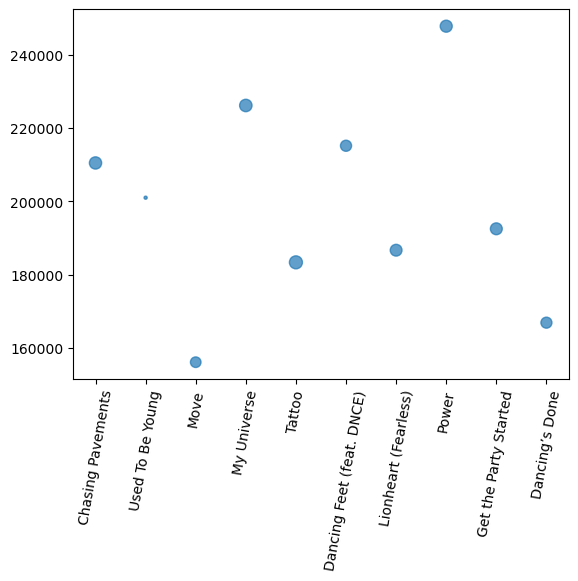

In [35]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
plt.xticks(rotation = 80)
# show the graph
plt.show()

In [36]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21768\1959306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)


In [37]:

reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21768\658718378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [38]:

reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,Chasing Pavements,False,210506,78,211.0,74
1,Used To Be Young,False,201023,5,201.0,1
2,Move,False,156116,58,156.0,54
3,My Universe,False,226198,80,226.0,76
4,Tattoo,False,183374,88,183.0,84
5,Dancing Feet (feat. DNCE),False,215200,64,215.0,60
6,Lionheart (Fearless),False,186689,72,187.0,68
7,Power,False,247840,75,248.0,71
8,Get the Party Started,False,192533,73,193.0,69
9,Dancing’s Done,False,166906,63,167.0,59


In [39]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


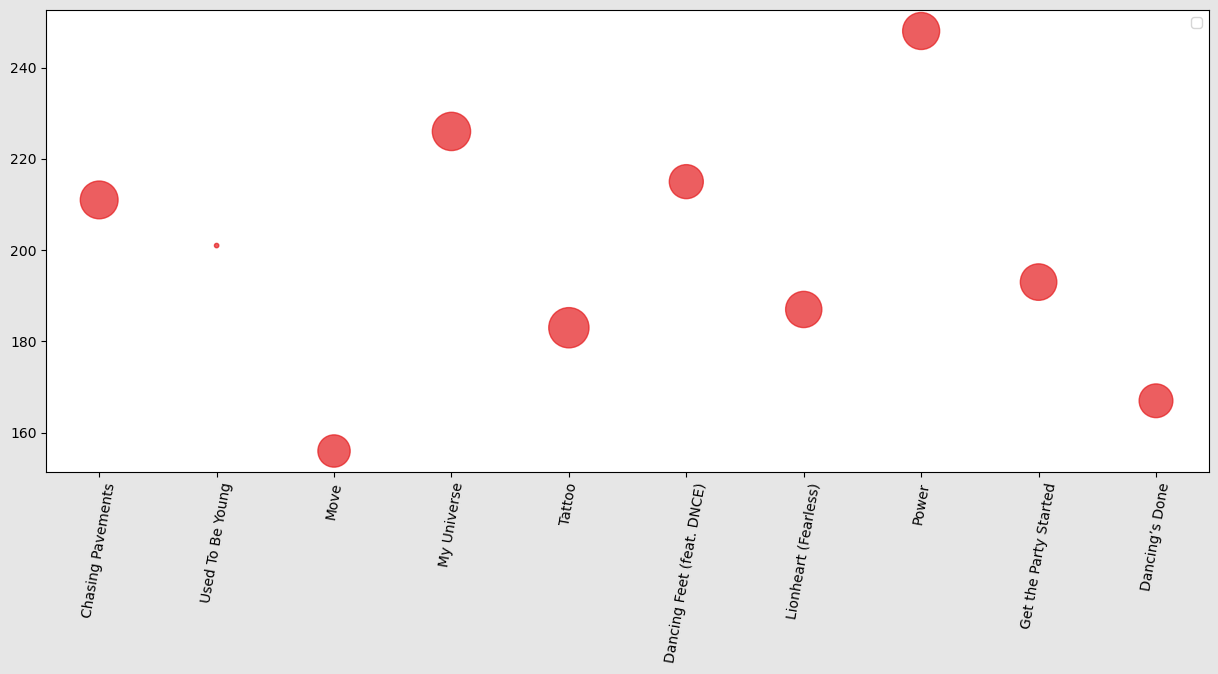

In [42]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_min']
s = reco_df['popularity_range']*10
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=80)
plt.legend()
# show the graph
plt.show()